# Laboratorio 2 - Agrupación

## Integrantes - Grupo 19
* Carol Sofía Florido Castro - 202111430
* Juan Martin Vasquez Cristancho - 202113314
* Natalia Villegas Calderon - 202113370


## Objetivos
* Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
* Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
* Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
* Construir una tabla comparativa que muestre el rendimiento de los tres modelos de agrupación.
* Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización.
* Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## Caso de Negocio: FinanzasAlpes

La agrupación es una técnica de aprendizaje no supervisado que permite identificar patrones y tendencias en los datos con base en la identificación de grupos o segmentos de objetos con características comunes. Por ejemplo, para el caso una empresa que ofrece servicios de tarjetas de crédito, la segmentación de clientes facilitaría la personalización de productos y servicios de acuerdo con las necesidades y comportamientos específicos de cada grupo identificado. Además, se podrían dirigir campañas de marketing a segmentos particulares, optimizando la comunicación y mejorando la experiencia de los clientes a través de un servicio de atención más ajustado a sus preferencias y hábitos.
En este marco, FinanzasAlpes, una empresa emisora de tarjetas de crédito, busca segmentar a sus clientes según su comportamiento de compra en centros comerciales, con el objetivo de identificar los distintos perfiles de tarjetahabientes y desarrollar estrategias de marketing personalizadas para cada segmento. Para llevar a cabo este estudio, la empresa nos ha contratado como científicos de datos y nos ha proporcionado un conjunto de datos sobre sus clientes, que incluye información detallada sobre saldos, límites de crédito, hábitos de compra y otros aspectos relevantes.



## Datos:
Se trabaja con un conjunto de datos que contiene 8950 registros de clientes bancarios con los siguientes atributos:

- **ID**: Identificador del cliente.
- **SALDO**: Saldo medio mensual (basado en los saldos medios diarios).
- **F_SALDO**: Relación de los últimos 12 meses con el saldo. (Entre 0 y 1, donde 1: Se actualiza con frecuencia, 0: No se actualiza con frecuencia).
- **COMPRAS**: Importe total de las compras realizadas en los últimos 12 meses.
- **COMPRAS_PUNTUALES**: Importe total de las compras puntuales.
- **COMPRAS_PLAZOS**: Importe total de las compras a plazos.
- **AVANCE_EFECTIVO**: Importe total de avance en efectivo.
- **F_COMPRAS**: Frecuencia de compras (Porcentaje de meses con al menos una compra). (Entre 0 y 1 donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PUNTUALES**: Frecuencia de las compras puntuales. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PLAZOS**: Frecuencia de compra a plazos. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_AVANCE_EFECTIVO**: Frecuencia de los avances en efectivo. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **P_AVANCE_EFECTIVO**: Importe medio por operación de avance en efectivo.
- **P_COMPRAS**: Importe medio por operación de compra.
- **LÍMITE_CREDITO**: Límite de crédito.
- **PAGOS**: Pagos totales (importe pagado por el cliente para reducir el saldo de su extracto en el periodo).
- **PAGOS_MINIMOS**: Total pagos mínimos en el periodo.
- **F_PAGOS_COMPLETOS**: Porcentaje de meses con pago completo del saldo vencido.
- **MESES_CLIENTE**: Número de meses como cliente.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler


# 0. Carga y manipulación básica de datos

In [5]:
df = pd.read_csv("202510_Laboratorio 2 - Agrupación_Customer_Data.csv", delimiter=";",encoding="latin1")
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


Se evidencia que el conjunto de datos tiene 8950 registros y 18 columnas.

In [6]:
df.shape

(8950, 18)

Se observan los tipos de datos cargados

In [7]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

Como se evidencia los tipos de datos coinciden con la información descrita en el diccionario de los mismos.

# 1. Entendimiento de los datos

Se cuenta con las siguientes variables

In [9]:
column_titles = df.columns.tolist()
column_titles

['ID',
 'SALDO',
 'F_SALDO',
 'COMPRAS',
 'COMPRAS_PUNTUALES',
 'COMPRAS_PLAZOS',
 'AVANCE_EFECTIVO',
 'F_COMPRAS',
 'F_COMPRAS_PUNTUALES',
 'F_COMPRAS_PLAZOS',
 'F_AVANCE_EFECTIVO',
 'P_AVANCE_EFECTIVO',
 'P_COMPRAS',
 'LÍMITE_CREDITO',
 'PAGOS',
 'PAGOS_MINIMOS',
 'F_PAGOS_COMPLETOS',
 'MESES_CLIENTE']

## 1.1 Atributos númericos y categóricos

### 1.1.1 Atributos numéricos

In [16]:
atributosNum = df.select_dtypes(include=[np.number]).columns

# Se usa drop para eliminar la columna 'MESES_CLIENTE'
atributosNum = atributosNum.drop('MESES_CLIENTE')

pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

,Atributos numéricos
0,SALDO
1,F_SALDO
2,COMPRAS
3,COMPRAS_PUNTUALES
4,COMPRAS_PLAZOS
5,AVANCE_EFECTIVO
6,F_COMPRAS
7,F_COMPRAS_PUNTUALES
8,F_COMPRAS_PLAZOS
9,F_AVANCE_EFECTIVO


A continuación, se presentan las descripciones de los atributos numéricos, detallando la media, la desviación estaándar, el mínimo, el máximo y los cuartiles. Estos valores luego se analizaran en la sección de Análisis de Consistencia y Análisis de Validez.

In [17]:
df[atributosNum].describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


Se generan las graficas boxplot para evidenciar como se distribuyen los datos en cada una de las variables numéricas.

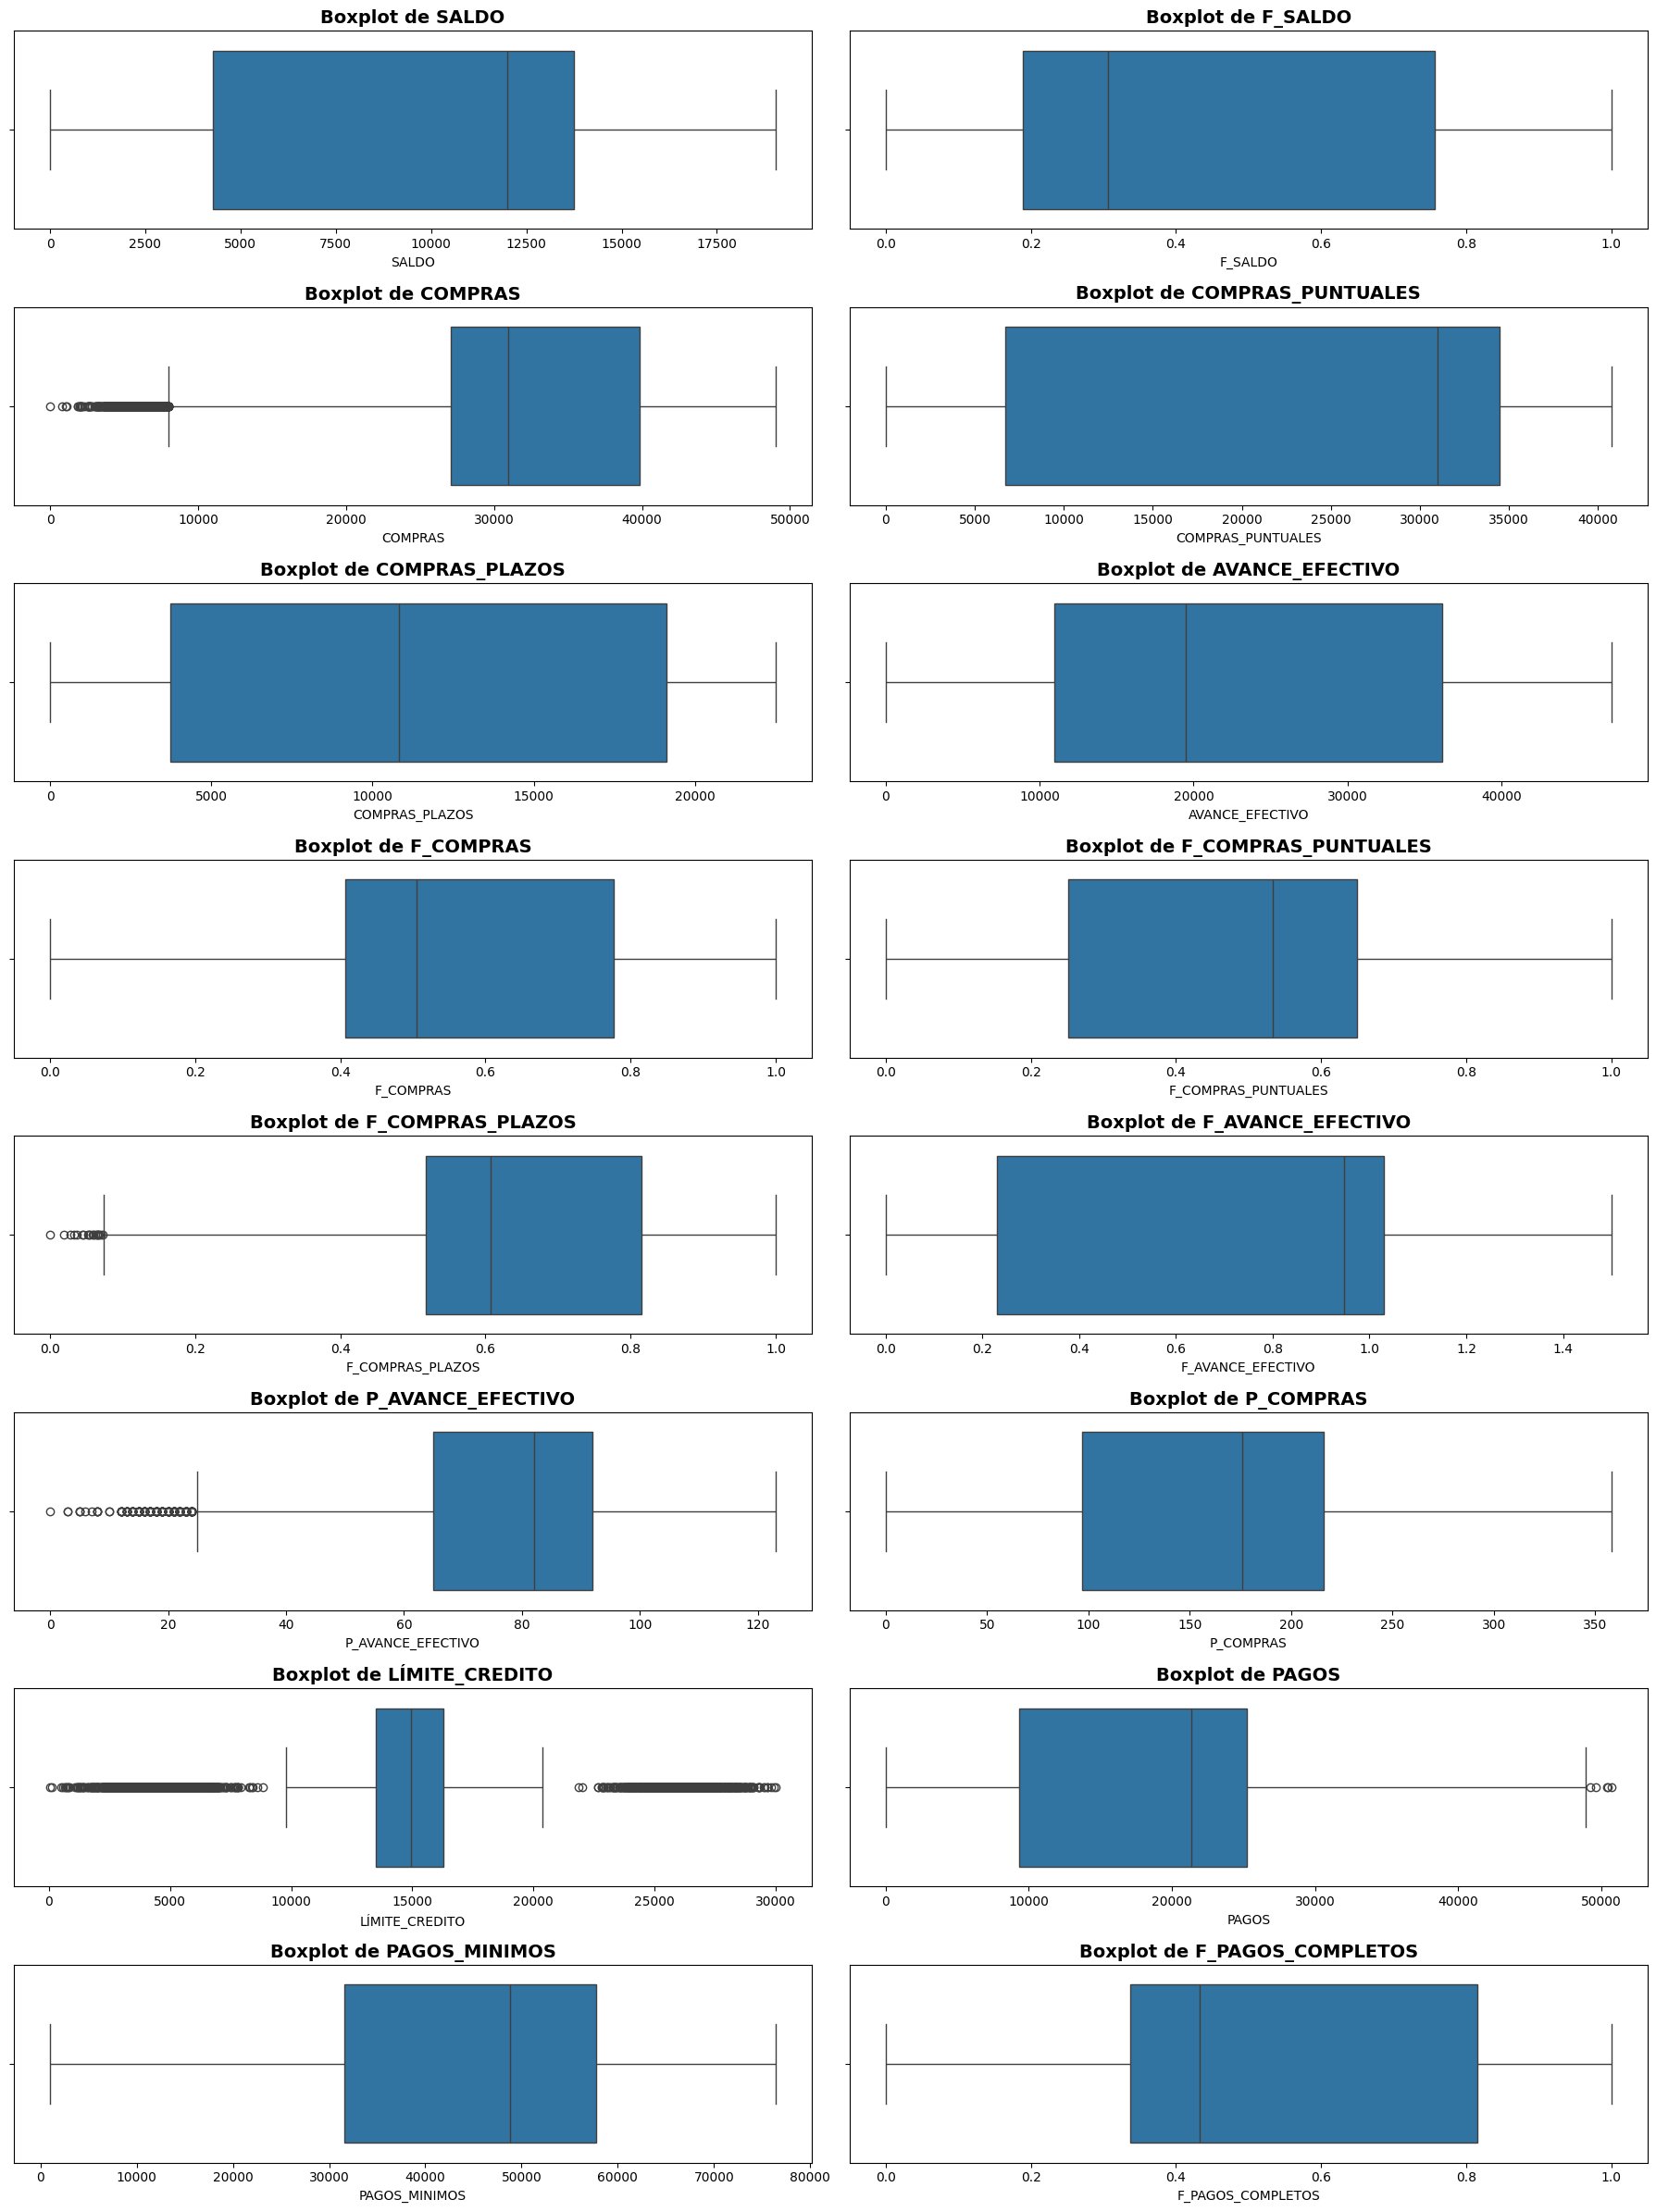

In [27]:
plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 1.1.2 Atributos categoricos

Se consideró que el unico atributo categórico es el número de meses como cliente, debido a que son enteros no continuos.

In [30]:
atributosCat = ['MESES_CLIENTE']

In [32]:
atributosCategoricos = df['MESES_CLIENTE'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,10,3336,37.273743
1,6,2091,23.363128
2,7,1414,15.798883
3,8,1021,11.407821
4,11,575,6.424581
5,9,512,5.720670
6,12,1,0.011173


Se realiza la grafica de los meses como cliente de los registros, para evidenciar la distribución de los mismos.

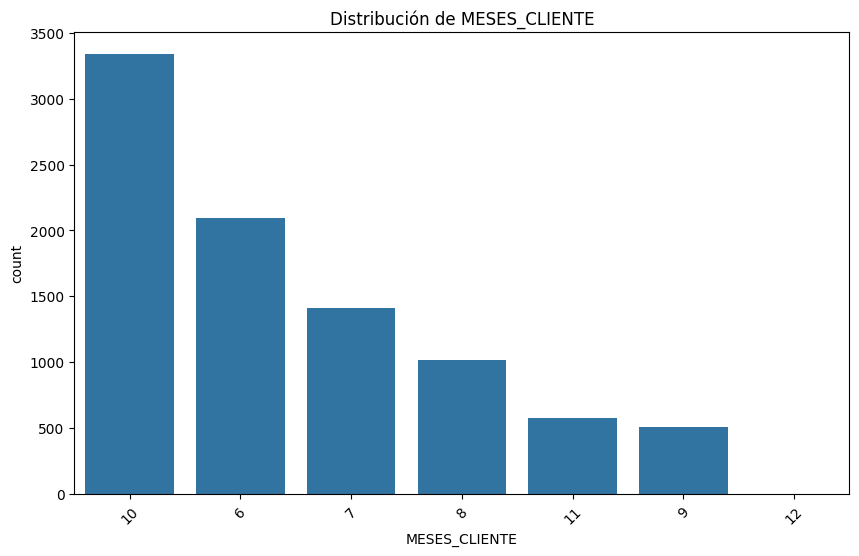

In [33]:
for col in atributosCat:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

## 1.2 Análisis de calidad de datos

### 1.2.1 Análisis de completitud

In [ ]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros duplicados": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros duplicados
0,PAGOS_MINIMOS,96.502793,3.497207,31300.0
1,LÍMITE_CREDITO,99.988827,0.011173,100.0
2,ID,100.000000,0.000000,0.0
3,SALDO,100.000000,0.000000,0.0
4,F_PAGOS_COMPLETOS,100.000000,0.000000,0.0
5,PAGOS,100.000000,0.000000,0.0
6,P_COMPRAS,100.000000,0.000000,0.0
7,P_AVANCE_EFECTIVO,100.000000,0.000000,0.0
8,F_AVANCE_EFECTIVO,100.000000,0.000000,0.0
9,F_COMPRAS_PLAZOS,100.000000,0.000000,0.0


Se evidencia que existen valores nulos en los datos. En específico respecto a la variable "PAGOS_MINIMOS" (con 3.5% de valores nulos) y la variable "LÍMITE_CREDITO" (con 0.01% de valores nulos). Al tratarse de muy pocos valores, se tiene varias opciones para tratarlos, como eliminar los registros que tienen estos valores nulos, reemplazarlos por un valor específico dado por el negocio o insertar algun tipo de valor estadístico como la media o la mediana. 

Las demás variables no presentan valores nulos.

### 1.2.2 Análisis de Unicidad

A continuación, se presenta el análisis de unicidad de los datos, es decir, se busca identificar si existen registros duplicados en el conjunto de datos.

In [35]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 0 registros duplicados (0.00%)


Se observa que no existen registros duplicados en el conjunto de datos.

### 1.2.3 Análisis de Validez

In [36]:
categorical_expected = {
    "MESES_CLIENTE": [1,2,3,4,5,6,7,8,9,10,11,12],
}

In [38]:
# Verificación de variables categóricas esperadas
for col, expected_values in categorical_expected.items():
    invalid_values = df[~df[col].isin(expected_values)][col].unique()
    if len(invalid_values) > 0:
        print(f"\nValores no esperados en {col}: {invalid_values}")
    else:
        print(f"\nTodos los valores en {col} son válidos")


Todos los valores en MESES_CLIENTE son válidos


Se evidencia que de la variable categorica de meses, no hay datos que no sean enteros y que por ello sean invalidos.

In [39]:
# Variables con un mínimo específico (en general es que las variables sean positivas)
numeric_minimums = {
    "F_SALDO": 0,
    "F_COMPRAS": 0,
    "F_COMPRAS_PUNTUALES": 0,
    "F_COMPRAS_PLAZOS": 0,
    "F_AVANCE_EFECTIVO": 0,
    "F_PAGOS_COMPLETOS": 0 # Un porcentaje debe ir de 0 a 1
}

# Variables con un máximo específico (no se tiene un maximo)
numeric_maximums = {
    "F_SALDO": 1,
    "F_COMPRAS": 1,
    "F_COMPRAS_PUNTUALES": 1,
    "F_COMPRAS_PLAZOS": 1,
    "F_AVANCE_EFECTIVO": 1,
    "F_PAGOS_COMPLETOS": 1
}

# Verificar mínimos
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nValores menores a {min_val} en {col}:")
        print(out_of_range.describe())

# Verificar máximos
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nValores mayores a {max_val} en {col}:")
        print(out_of_range.describe())



Valores mayores a 1 en F_AVANCE_EFECTIVO:
count    3040.000000
mean        1.130566
std         0.131954
min         1.000002
25%         1.027292
50%         1.065099
75%         1.258586
max         1.500000
Name: F_AVANCE_EFECTIVO, dtype: float64


In [42]:
print("Porcentaje de registros fuera del rango", 3040.000000/df.shape[0] * 100)

Porcentaje de registros fuera del rango 33.96648044692737


Al analizar las variables numéricas, se verificó que las que tuvieran un rango determinado de valores, no presentaran datos fuera del mismo. Según el diccionario de datos, las variables que tienen un rango determinado de valores son: "F_SALDO", "F_COMPRAS", "F_COMPRAS_PUNTUALES","F_COMPRAS_PLAZOS","F_AVANCE_EFECTIVO",
"F_PAGOS_COMPLETOS" (esta última aunque no lo indican explítamente, al ser un porcentaje, se asume que debe estar entre 0 y 1).

De este análisis se encontro que para la variable "F_AVANCE_EFECTIVO" se encontraron 3040 registros con valores fuera del rango permitido, por lo que se procedió a preguntarle al experto de como tratar estos datos (ya que son cerca de 33.96% de los datos).